In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import xgboost as xgb

In [ ]:
df1 = pd.read_csv('datasets/indian_engineering_student_placement.csv')
df1.head(10)

,Student_ID,gender,branch,cgpa,tenth_percentage,twelfth_percentage,backlogs,study_hours_per_day,attendance_percentage,projects_completed,...,aptitude_skill_rating,hackathons_participated,certifications_count,sleep_hours,stress_level,part_time_job,family_income_level,city_tier,internet_access,extracurricular_involvement
0,1,Male,ECE,8.74,74.0,75.0,0,3.8,71.1,7,...,5,4,5,6.5,8,Yes,Medium,Tier 2,Yes,Medium
1,2,Female,ECE,7.80,75.3,69.7,0,6.3,69.5,5,...,3,4,1,7.1,8,Yes,Medium,Tier 3,Yes,Low
2,3,Female,IT,6.95,62.8,68.3,0,1.5,62.5,8,...,4,6,3,6.1,2,No,Low,Tier 2,Yes,High
3,4,Male,ECE,7.46,57.9,51.4,1,4.7,64.6,6,...,4,2,2,7.3,7,No,Medium,Tier 1,Yes,Low
4,5,Male,IT,6.86,61.3,73.5,2,5.2,75.9,3,...,3,2,1,6.0,7,No,Medium,Tier 1,Yes,Medium
5,6,Male,CSE,7.46,70.5,70.4,3,3.6,81.7,5,...,4,2,2,8.8,10,Yes,High,Tier 1,Yes,Medium
6,7,Male,CE,8.26,81.2,74.8,0,1.8,59.6,4,...,3,4,4,5.7,8,No,Low,Tier 1,No,High
7,8,Female,IT,7.01,63.9,61.2,0,2.4,64.7,7,...,4,4,5,4.2,10,No,Medium,Tier 2,Yes,Low
8,9,Female,CSE,7.97,71.4,73.8,1,7.6,75.5,7,...,4,5,7,5.4,10,No,Medium,Tier 2,Yes,Medium
9,10,Female,ECE,8.79,70.1,77.1,0,5.9,77.2,7,...,4,4,3,7.5,10,Yes,Medium,Tier 1,Yes,Low


In [ ]:
df2 = pd.read_csv('datasets/placement_targets.csv')
df2.head(10)

,Student_ID,placement_status,salary_lpa
0,1,Placed,14.95
1,2,Placed,14.91
2,3,Placed,17.73
3,4,Placed,14.52
4,5,Placed,15.91
5,6,Placed,14.27
6,7,Placed,10.97
7,8,Placed,13.41
8,9,Placed,18.83
9,10,Placed,17.66


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Student_ID                   5000 non-null   int64  
 1   gender                       5000 non-null   object 
 2   branch                       5000 non-null   object 
 3   cgpa                         5000 non-null   float64
 4   tenth_percentage             5000 non-null   float64
 5   twelfth_percentage           5000 non-null   float64
 6   backlogs                     5000 non-null   int64  
 7   study_hours_per_day          5000 non-null   float64
 8   attendance_percentage        5000 non-null   float64
 9   projects_completed           5000 non-null   int64  
 10  internships_completed        5000 non-null   int64  
 11  coding_skill_rating          5000 non-null   int64  
 12  communication_skill_rating   5000 non-null   int64  
 13  aptitude_skill_rat

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Student_ID        5000 non-null   int64  
 1   placement_status  5000 non-null   object 
 2   salary_lpa        5000 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 117.3+ KB


In [ ]:
df2.columns

Index(['Student_ID', 'placement_status', 'salary_lpa'], dtype='object')

In [ ]:
df1 = pd.merge(df1, df2, on='Student_ID', how='inner')
print("Merged Dataset Shape:", df1.shape)

Merged Dataset Shape: (5000, 25)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Student_ID                   5000 non-null   int64  
 1   gender                       5000 non-null   object 
 2   branch                       5000 non-null   object 
 3   cgpa                         5000 non-null   float64
 4   tenth_percentage             5000 non-null   float64
 5   twelfth_percentage           5000 non-null   float64
 6   backlogs                     5000 non-null   int64  
 7   study_hours_per_day          5000 non-null   float64
 8   attendance_percentage        5000 non-null   float64
 9   projects_completed           5000 non-null   int64  
 10  internships_completed        5000 non-null   int64  
 11  coding_skill_rating          5000 non-null   int64  
 12  communication_skill_rating   5000 non-null   int64  
 13  aptitude_skill_rat

In [ ]:
# Check for missing values
print("Missing Values:")
print(df1.isnull().sum())
print("\nMissing Values Percentage:")
print((df1.isnull().sum() / len(df1) * 100).round(2))

Missing Values:
Student_ID                        0
gender                            0
branch                            0
cgpa                              0
tenth_percentage                  0
twelfth_percentage                0
backlogs                          0
study_hours_per_day               0
attendance_percentage             0
projects_completed                0
internships_completed             0
coding_skill_rating               0
communication_skill_rating        0
aptitude_skill_rating             0
hackathons_participated           0
certifications_count              0
sleep_hours                       0
stress_level                      0
part_time_job                     0
family_income_level               0
city_tier                         0
internet_access                   0
extracurricular_involvement    1006
placement_status                  0
salary_lpa                        0
dtype: int64

Missing Values Percentage:
Student_ID                      0.00
gender

# Exploratory Data Analysis (EDA)

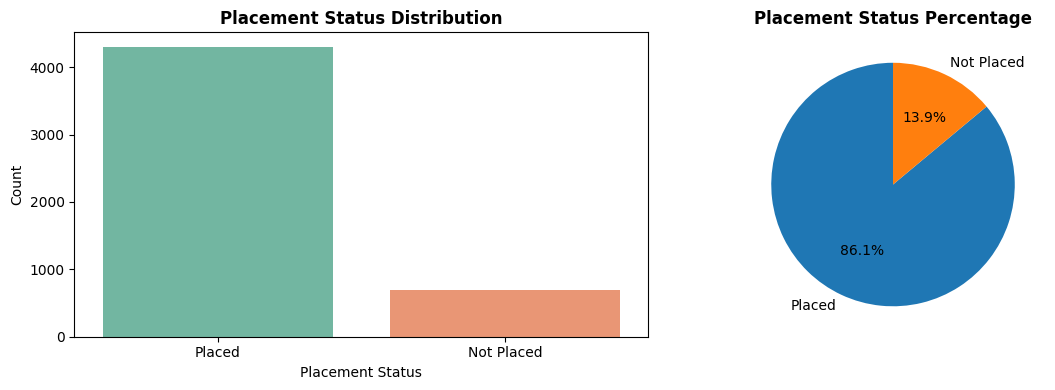

Placement Status Counts:
placement_status
Placed        4303
Not Placed     697
Name: count, dtype: int64


In [ ]:
# Get numerical columns
numerical_cols = df1.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != 'student_id']

# Target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
sns.countplot(x='placement_status', data=df1, ax=axes[0], palette='Set2')
axes[0].set_title('Placement Status Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Placement Status')
axes[0].set_ylabel('Count')

# Pie chart
placement_counts = df1['placement_status'].value_counts()
axes[1].pie(placement_counts, labels=placement_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Placement Status Percentage', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("Placement Status Counts:")
print(df1['placement_status'].value_counts())

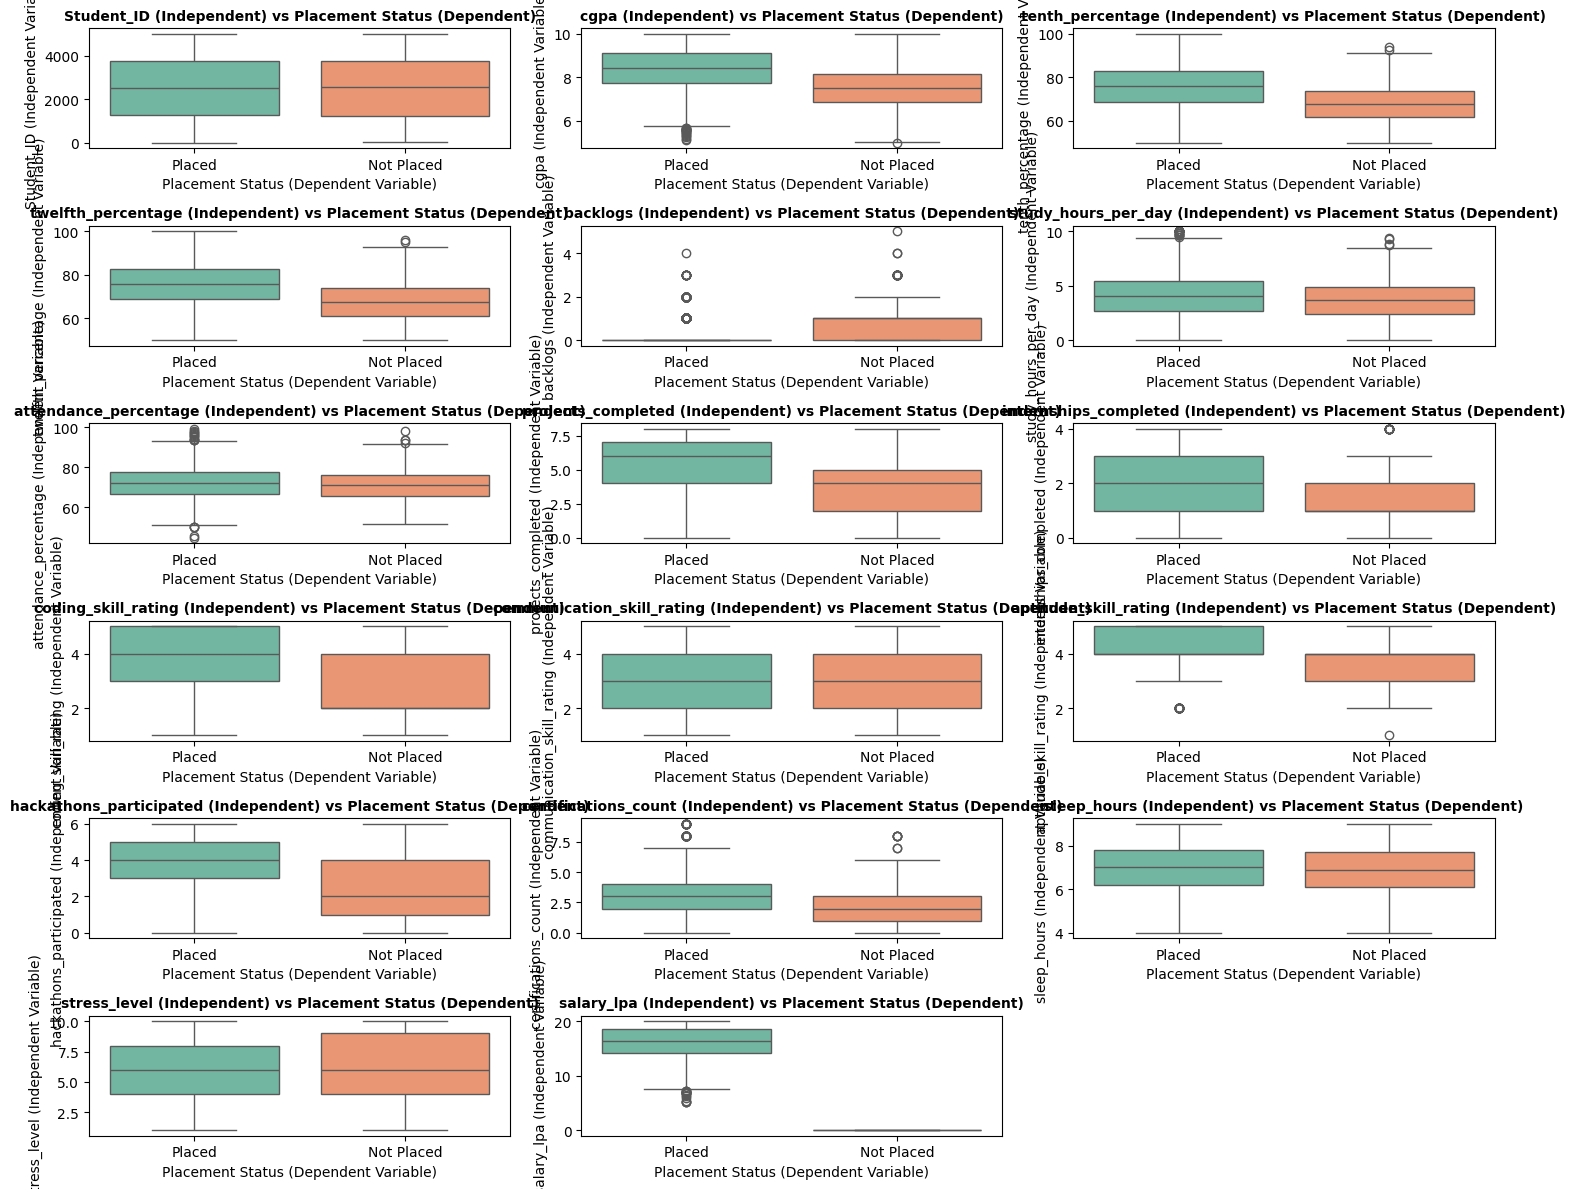

In [ ]:
# Placement Status vs Numerical Features (Independent vs Dependent)
fig, axes = plt.subplots(len(numerical_cols) // 3 + 1, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    sns.boxplot(x='placement_status', y=col, data=df1, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{col} (Independent) vs Placement Status (Dependent)', fontweight='bold', fontsize=10)
    axes[idx].set_xlabel('Placement Status (Dependent Variable)')
    axes[idx].set_ylabel(f'{col} (Independent Variable)')

# Hide extra subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


BASELINE MODELS (Before Hyperparameter Tuning)

1. LOGISTIC REGRESSION (Baseline)
------------------------------------------------------------
Accuracy: 1.0000

2. RANDOM FOREST (Baseline)
------------------------------------------------------------
Accuracy: 1.0000

BASELINE MODEL COMPARISON
                            Model  Accuracy
0  Logistic Regression (Baseline)       1.0
1        Random Forest (Baseline)       1.0


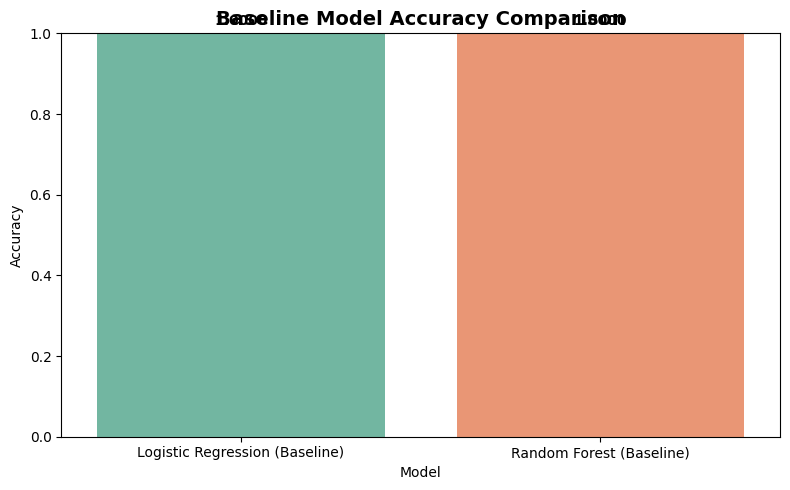

In [ ]:
# Basic Models (Before Hyperparameter Tuning) - BASELINE COMPARISON
print("\n" + "=" * 80)
print("BASELINE MODELS (Before Hyperparameter Tuning)")
print("=" * 80)

# Model 1: Logistic Regression
print("\n1. LOGISTIC REGRESSION (Baseline)")
print("-" * 60)
lr_baseline = LogisticRegression(random_state=42, max_iter=1000)
lr_baseline.fit(X_train_scaled, y_train)
y_pred_lr_baseline = lr_baseline.predict(X_test_scaled)
accuracy_lr_baseline = accuracy_score(y_test, y_pred_lr_baseline)
print(f"Accuracy: {accuracy_lr_baseline:.4f}")

# Model 2: Random Forest
print("\n2. RANDOM FOREST (Baseline)")
print("-" * 60)
rf_baseline = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_baseline.fit(X_train, y_train)
y_pred_rf_baseline = rf_baseline.predict(X_test)
accuracy_rf_baseline = accuracy_score(y_test, y_pred_rf_baseline)
print(f"Accuracy: {accuracy_rf_baseline:.4f}")

# Baseline Model Comparison
models_comparison_baseline = pd.DataFrame({
    'Model': ['Logistic Regression (Baseline)', 'Random Forest (Baseline)'],
    'Accuracy': [accuracy_lr_baseline, accuracy_rf_baseline]
})

print("\n" + "=" * 60)
print("BASELINE MODEL COMPARISON")
print("=" * 60)
print(models_comparison_baseline)

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data=models_comparison_baseline, x='Model', y='Accuracy', palette='Set2', ax=ax)
ax.set_title('Baseline Model Accuracy Comparison', fontsize=14, fontweight='bold')
ax.set_ylabel('Accuracy')
ax.set_ylim([0, 1])
for i, v in enumerate(models_comparison_baseline['Accuracy']):
    ax.text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()


INDEPENDENT FEATURES vs DEPENDENT VARIABLE (Placement Status)

Independent Variables (Features):
  1. Student_ID
  2. cgpa
  3. tenth_percentage
  4. twelfth_percentage
  5. backlogs
  6. study_hours_per_day
  7. attendance_percentage
  8. projects_completed
  9. internships_completed
  10. coding_skill_rating
  11. communication_skill_rating
  12. aptitude_skill_rating
  13. hackathons_participated
  14. certifications_count
  15. sleep_hours
  16. stress_level
  17. salary_lpa
  18. gender
  19. branch
  20. part_time_job
  21. family_income_level
  22. city_tier
  23. internet_access
  24. extracurricular_involvement

Dependent Variable (Target):
  1. placement_status

Total Independent Variables: 24
Total Samples: 3994


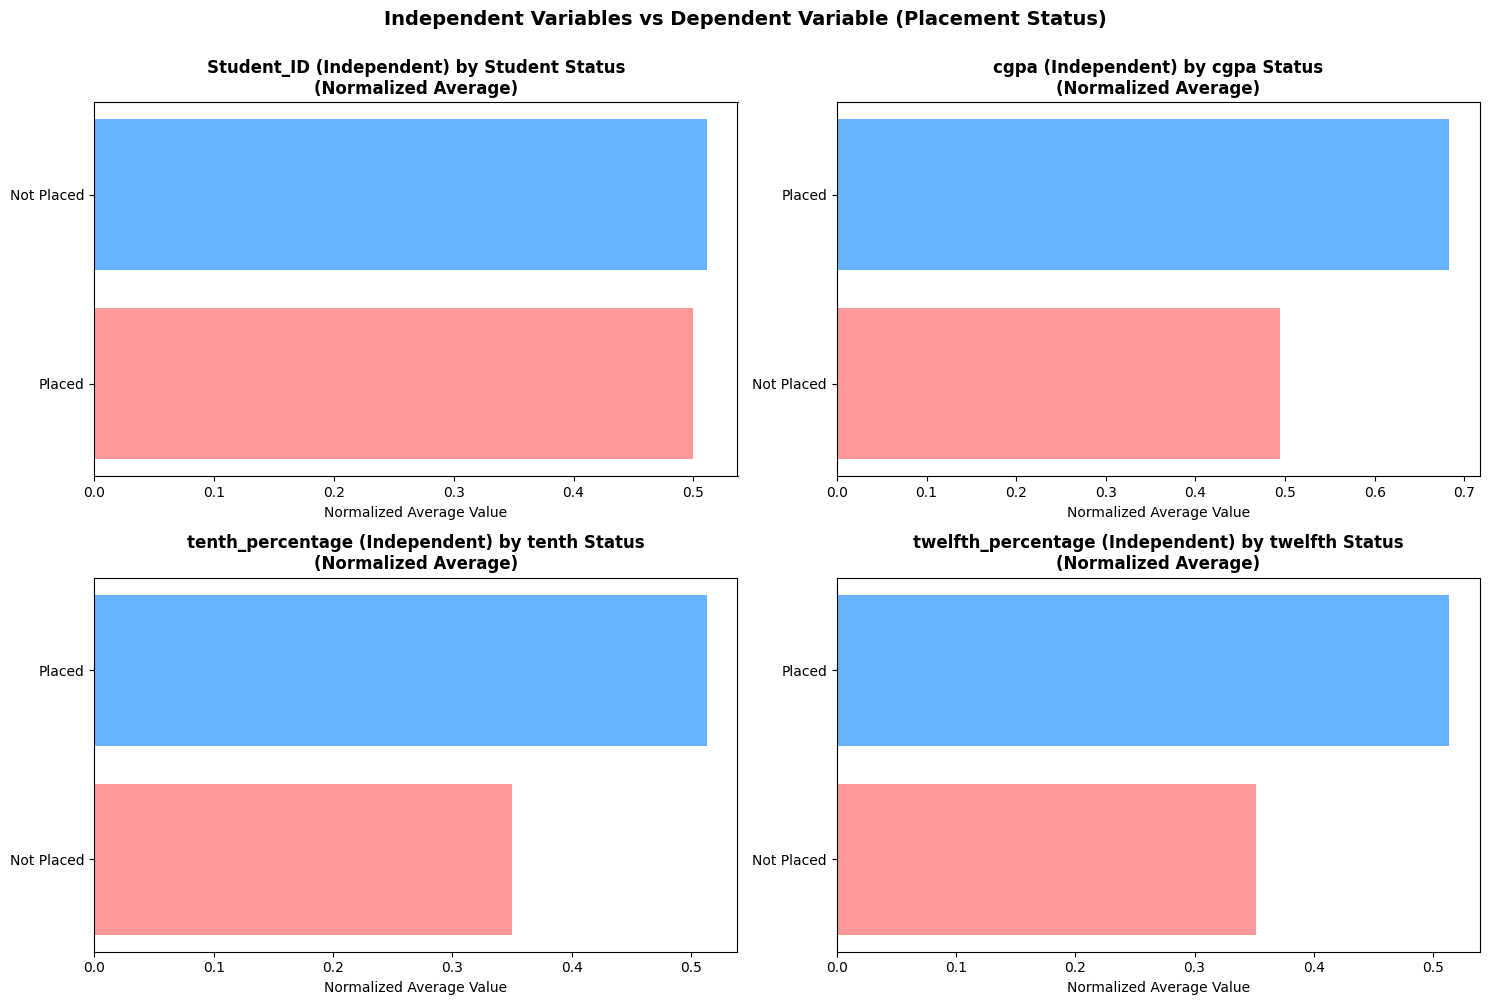

In [ ]:
# Independent vs Dependent Variables Visualization
print("\n" + "=" * 80)
print("INDEPENDENT FEATURES vs DEPENDENT VARIABLE (Placement Status)")
print("=" * 80)

# Create a summary showing which features are independent and which is dependent
print("\nIndependent Variables (Features):")
for i, col in enumerate(X.columns, 1):
    print(f"  {i}. {col}")

print(f"\nDependent Variable (Target):")
print(f"  1. placement_status")

print(f"\nTotal Independent Variables: {len(X.columns)}")
print(f"Total Samples: {len(df_model)}")

# Visualization: Average values of independent variables by placement status
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Normalize numerical columns for visualization
X_normalized = (X[numerical_cols] - X[numerical_cols].min()) / (X[numerical_cols].max() - X[numerical_cols].min())
df_viz = X_normalized.copy()
df_viz['placement_status'] = le_target.inverse_transform(y_encoded)

plot_idx = 0
for i, col in enumerate(numerical_cols[:4]):
    avg_by_status = df_viz.groupby('placement_status')[col].mean().sort_values()
    
    axes[plot_idx].barh(avg_by_status.index, avg_by_status.values, color=['#ff9999', '#66b3ff', '#99ff99'][:len(avg_by_status)])
    axes[plot_idx].set_title(f'{col} (Independent) by {col.split("_")[0]} Status\n(Normalized Average)', fontweight='bold')
    axes[plot_idx].set_xlabel('Normalized Average Value')
    
    plot_idx += 1

plt.suptitle('Independent Variables vs Dependent Variable (Placement Status)', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [ ]:
# Data preparation for classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# Prepare features and target
df_model = df1.dropna()

# Encode categorical variables if any
categorical_cols = df_model.select_dtypes(include=['object']).columns.tolist()
if 'placement_status' in categorical_cols:
    categorical_cols.remove('placement_status')

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# Prepare X and y
X = df_model[numerical_cols + categorical_cols]
# Remove salary_lpa to avoid data leakage (salary is only present if student is placed)
X = X.drop('salary_lpa', axis=1, errors='ignore')
y = df_model['placement_status']

# Encode target variable
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print("Features shape:", X.shape)
print("Target classes:", le_target.classes_)
print("Class distribution:")
print(pd.Series(y_encoded, index=y.index).value_counts())

Features shape: (3994, 24)
Target classes: ['Not Placed' 'Placed']
Class distribution:
1    3422
0     572
Name: count, dtype: int64


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set size:", X_train_scaled.shape)
print("Test set size:", X_test_scaled.shape)
print(f"Train/Test Split: 80/20")

Training set size: (3195, 24)
Test set size: (799, 24)
Train/Test Split: 80/20


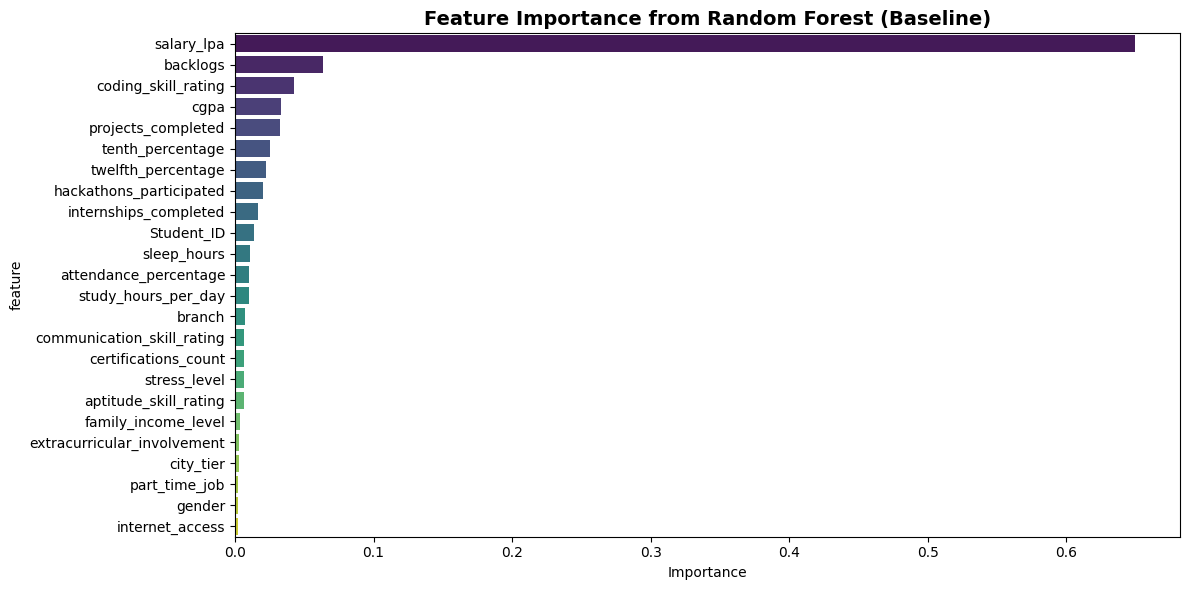


Top 10 Important Features:
                    feature  importance
16               salary_lpa    0.649644
4                  backlogs    0.063577
9       coding_skill_rating    0.042715
1                      cgpa    0.033049
7        projects_completed    0.032409
2          tenth_percentage    0.025353
3        twelfth_percentage    0.022661
12  hackathons_participated    0.019844
8     internships_completed    0.016286
0                Student_ID    0.013815


In [ ]:
# Feature Importance from Baseline Random Forest
fig, ax = plt.subplots(figsize=(12, 6))
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_baseline.feature_importances_
}).sort_values('importance', ascending=False)

sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis', ax=ax)
ax.set_title('Feature Importance from Random Forest (Baseline)', fontsize=14, fontweight='bold')
ax.set_xlabel('Importance')
plt.tight_layout()
plt.show()

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

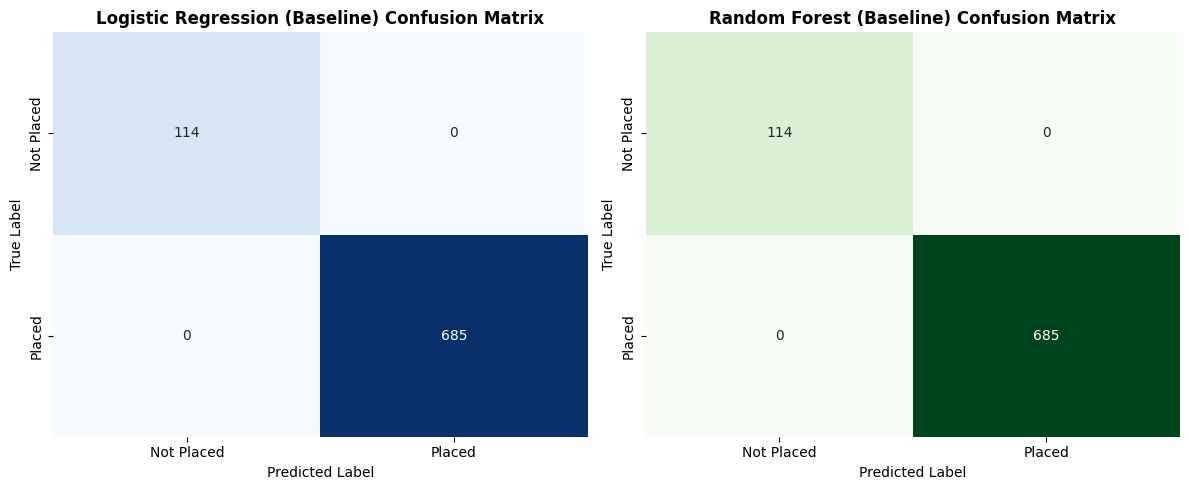

In [ ]:
# Confusion Matrix Visualization - Baseline Models
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr_baseline)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False,
            xticklabels=le_target.classes_, yticklabels=le_target.classes_)
axes[0].set_title('Logistic Regression (Baseline) Confusion Matrix', fontweight='bold')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf_baseline)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1], cbar=False,
            xticklabels=le_target.classes_, yticklabels=le_target.classes_)
axes[1].set_title('Random Forest (Baseline) Confusion Matrix', fontweight='bold')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

# Classification Model for Placement Status

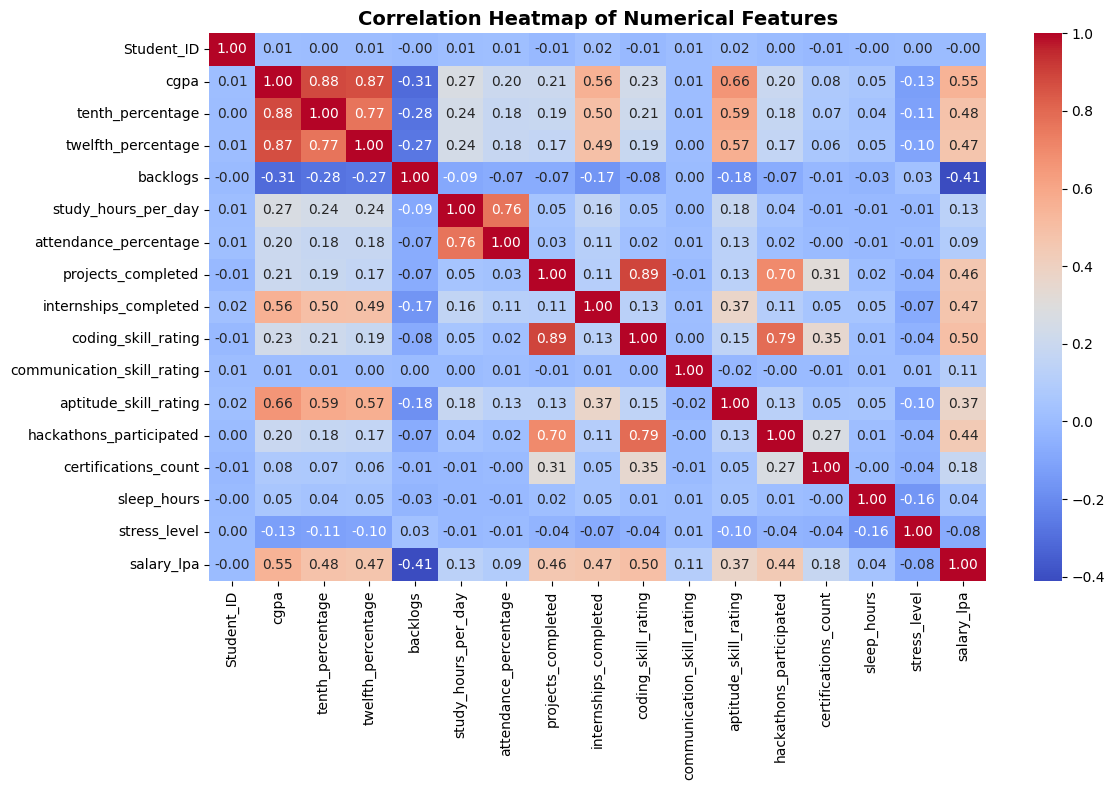

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df1[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

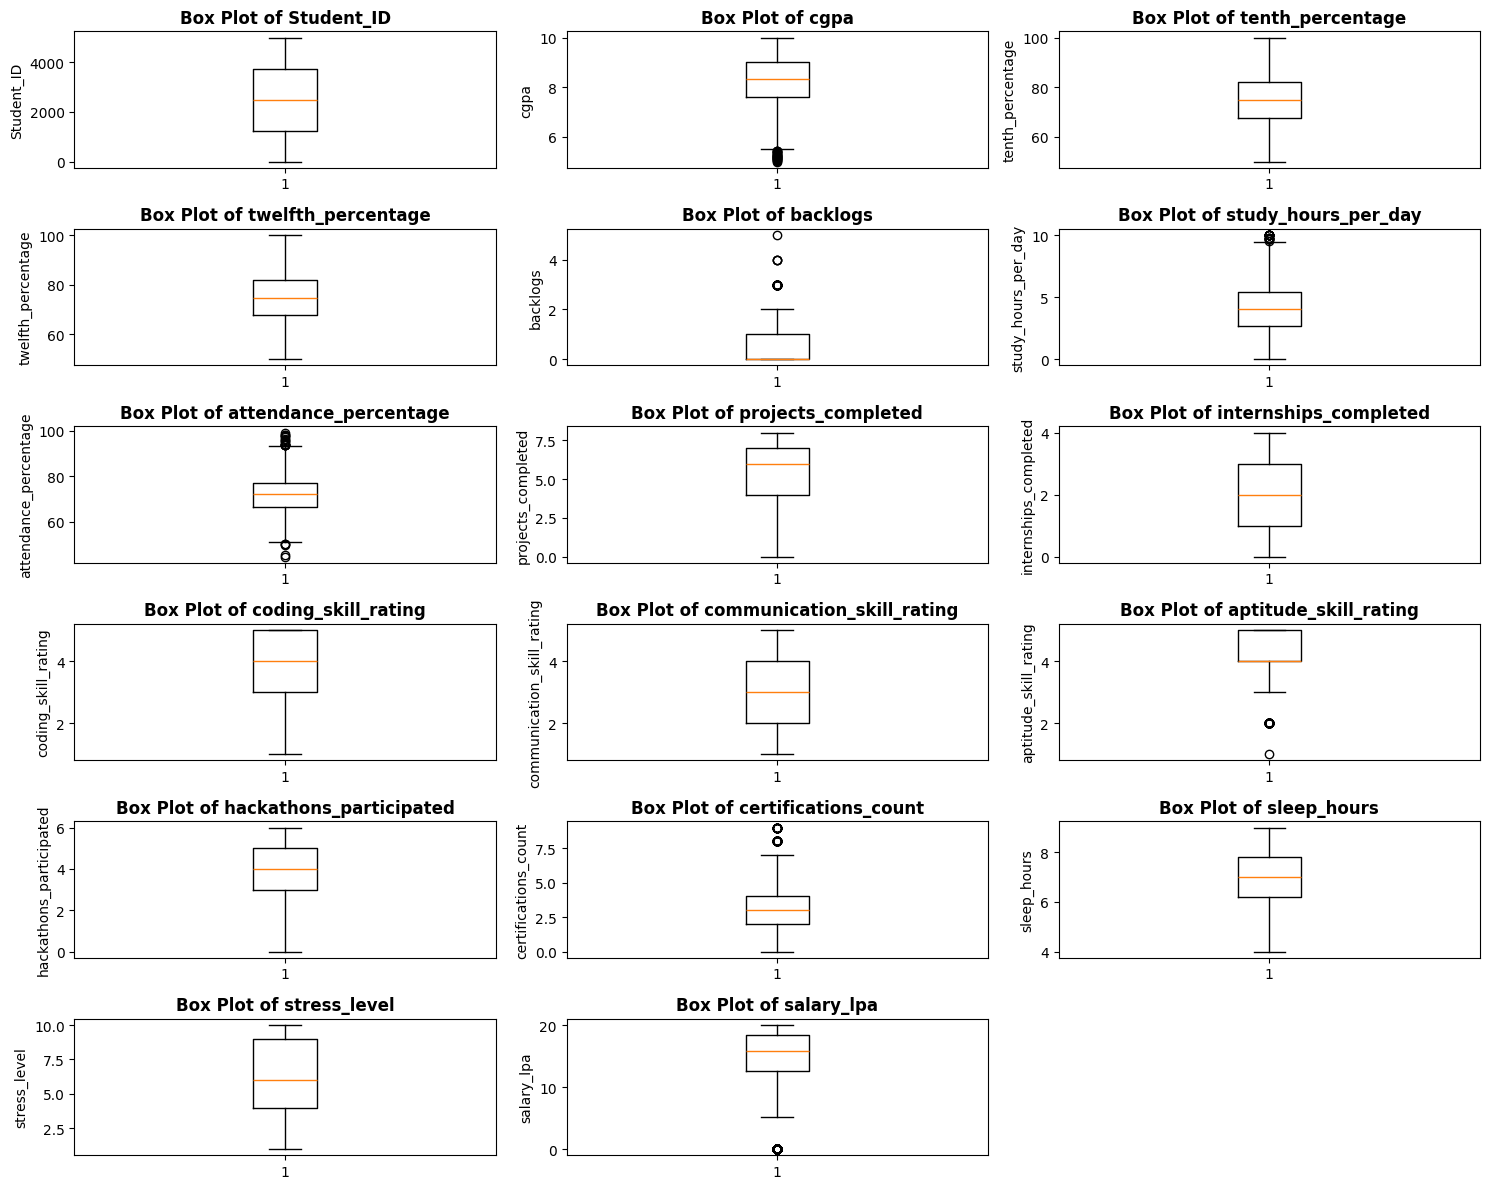

In [ ]:
# Box plots for outlier detection
fig, axes = plt.subplots(len(numerical_cols) // 3 + 1, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df1[col].dropna())
    axes[idx].set_title(f'Box Plot of {col}', fontweight='bold')
    axes[idx].set_ylabel(col)

# Hide extra subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

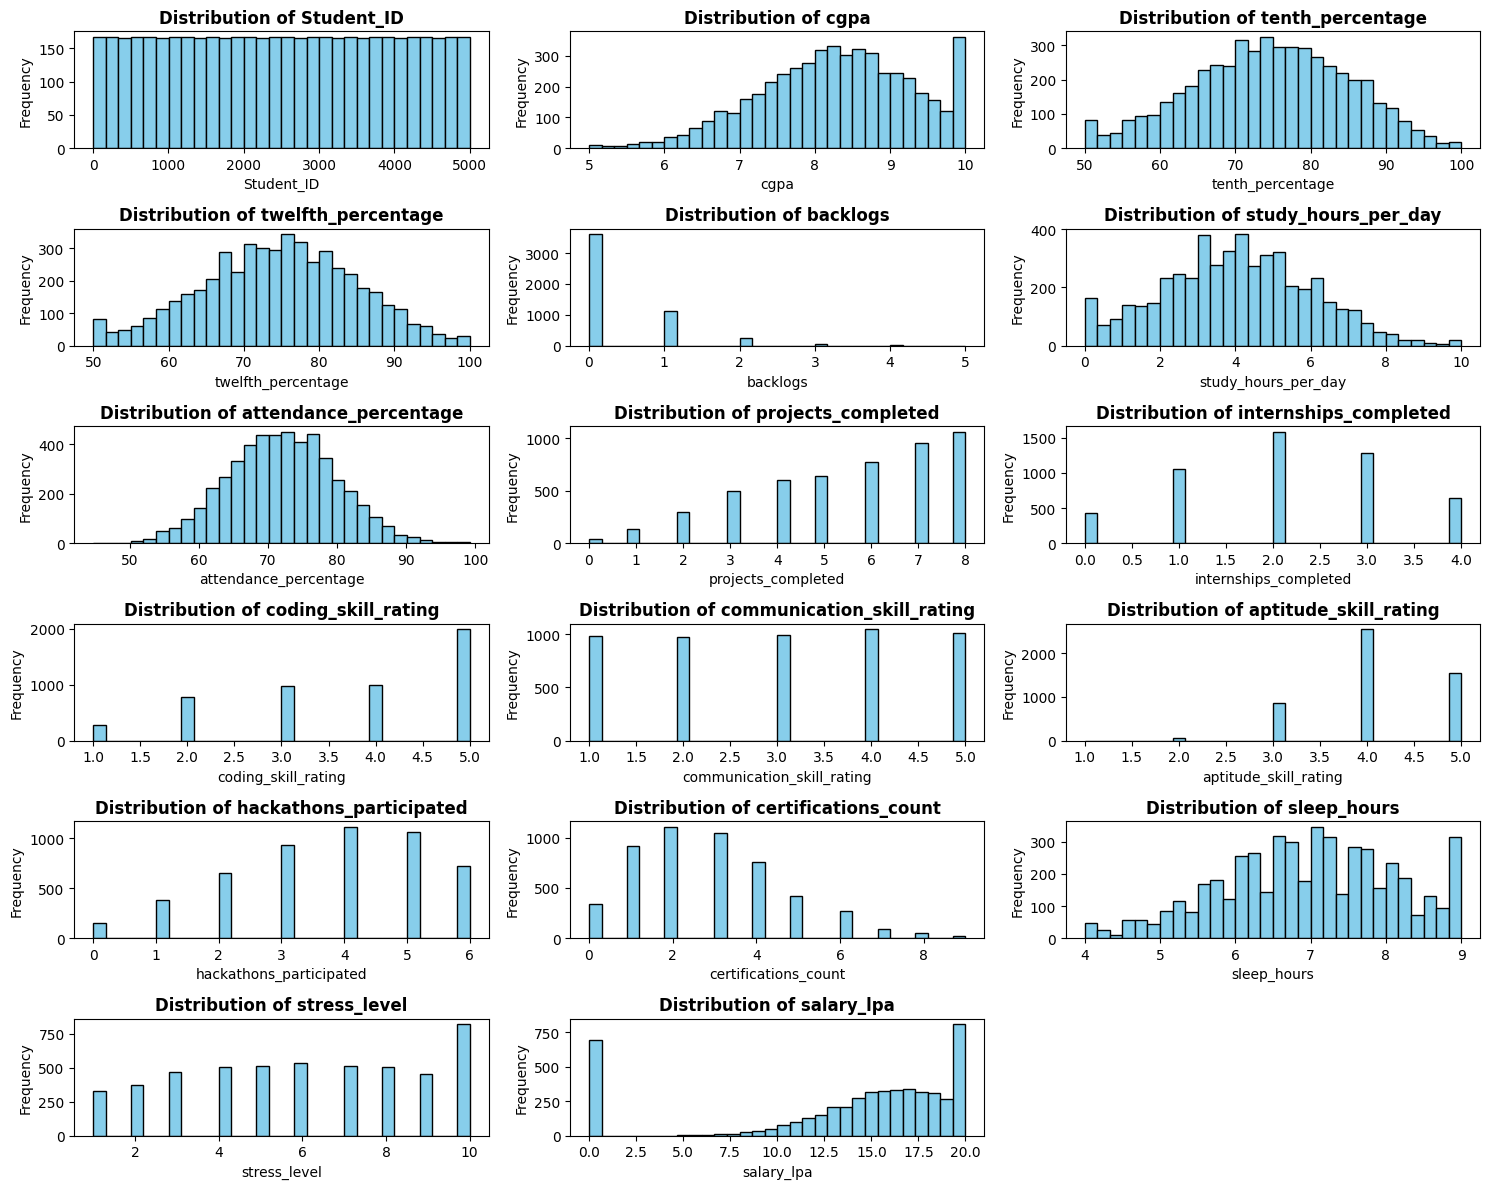

In [ ]:
# Distribution of numerical features
fig, axes = plt.subplots(len(numerical_cols) // 3 + 1, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df1[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# Hide extra subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# Data Visualization

In [ ]:
# Statistical Summary
print("Numerical Columns Summary:")
df1.describe()

Numerical Columns Summary:


,Student_ID,cgpa,tenth_percentage,twelfth_percentage,backlogs,study_hours_per_day,attendance_percentage,projects_completed,internships_completed,coding_skill_rating,communication_skill_rating,aptitude_skill_rating,hackathons_participated,certifications_count,sleep_hours,stress_level,salary_lpa
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,8.283798,74.537400,74.543060,0.343600,4.041120,72.041560,5.529400,2.132600,3.728600,3.025400,4.116400,3.704200,2.836000,6.955000,6.020200,13.897180
std,1443.520003,1.008391,10.266752,10.244481,0.612547,1.967754,7.720029,2.053772,1.143713,1.278464,1.412358,0.716208,1.603252,1.781724,1.147881,2.851213,6.247481
min,1.000000,5.000000,50.000000,50.000000,0.000000,0.000000,44.700000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000
25%,1250.750000,7.610000,67.400000,67.600000,0.000000,2.700000,66.600000,4.000000,1.000000,3.000000,2.000000,4.000000,3.000000,2.000000,6.200000,4.000000,12.510000
50%,2500.500000,8.320000,74.700000,74.800000,0.000000,4.000000,72.050000,6.000000,2.000000,4.000000,3.000000,4.000000,4.000000,3.000000,7.000000,6.000000,15.760000
75%,3750.250000,9.020000,82.000000,81.700000,1.000000,5.400000,77.200000,7.000000,3.000000,5.000000,4.000000,5.000000,5.000000,4.000000,7.800000,9.000000,18.332500
max,5000.000000,10.000000,100.000000,100.000000,5.000000,10.000000,99.200000,8.000000,4.000000,5.000000,5.000000,5.000000,6.000000,9.000000,9.000000,10.000000,20.000000


In [ ]:
# Check for missing values
print("Missing Values:")
print(df1.isnull().sum())
print("\nMissing Values Percentage:")
print((df1.isnull().sum() / len(df1) * 100).round(2))

Missing Values:
Student_ID                        0
gender                            0
branch                            0
cgpa                              0
tenth_percentage                  0
twelfth_percentage                0
backlogs                          0
study_hours_per_day               0
attendance_percentage             0
projects_completed                0
internships_completed             0
coding_skill_rating               0
communication_skill_rating        0
aptitude_skill_rating             0
hackathons_participated           0
certifications_count              0
sleep_hours                       0
stress_level                      0
part_time_job                     0
family_income_level               0
city_tier                         0
internet_access                   0
extracurricular_involvement    1006
placement_status                  0
salary_lpa                        0
dtype: int64

Missing Values Percentage:
Student_ID                      0.00
gender

In [ ]:
# Statistical Summary
print("Numerical Columns Summary:")
df1.describe()

Numerical Columns Summary:


,Student_ID,cgpa,tenth_percentage,twelfth_percentage,backlogs,study_hours_per_day,attendance_percentage,projects_completed,internships_completed,coding_skill_rating,communication_skill_rating,aptitude_skill_rating,hackathons_participated,certifications_count,sleep_hours,stress_level,salary_lpa
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,8.283798,74.537400,74.543060,0.343600,4.041120,72.041560,5.529400,2.132600,3.728600,3.025400,4.116400,3.704200,2.836000,6.955000,6.020200,13.897180
std,1443.520003,1.008391,10.266752,10.244481,0.612547,1.967754,7.720029,2.053772,1.143713,1.278464,1.412358,0.716208,1.603252,1.781724,1.147881,2.851213,6.247481
min,1.000000,5.000000,50.000000,50.000000,0.000000,0.000000,44.700000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000
25%,1250.750000,7.610000,67.400000,67.600000,0.000000,2.700000,66.600000,4.000000,1.000000,3.000000,2.000000,4.000000,3.000000,2.000000,6.200000,4.000000,12.510000
50%,2500.500000,8.320000,74.700000,74.800000,0.000000,4.000000,72.050000,6.000000,2.000000,4.000000,3.000000,4.000000,4.000000,3.000000,7.000000,6.000000,15.760000
75%,3750.250000,9.020000,82.000000,81.700000,1.000000,5.400000,77.200000,7.000000,3.000000,5.000000,4.000000,5.000000,5.000000,4.000000,7.800000,9.000000,18.332500
max,5000.000000,10.000000,100.000000,100.000000,5.000000,10.000000,99.200000,8.000000,4.000000,5.000000,5.000000,5.000000,6.000000,9.000000,9.000000,10.000000,20.000000


In [ ]:
# 7. Improved Random Forest with GridSearchCV
print("\n7. RANDOM FOREST - GridSearchCV (Tuned)")
print("-" * 60)

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    rf_params,
    cv=5,
    n_jobs=-1,
    verbose=0
)

rf_grid.fit(X_train, y_train)
y_pred_rf_tuned = rf_grid.predict(X_test)
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)

print(f"Best Parameters: {rf_grid.best_params_}")
print(f"Best CV Score: {rf_grid.best_score_:.4f}")
print(f"Test Accuracy: {accuracy_rf_tuned:.4f}")


7. RANDOM FOREST - GridSearchCV (Tuned)
------------------------------------------------------------
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 1.0000
Test Accuracy: 1.0000


In [ ]:
# 6. XGBoost with GridSearchCV
print("\n6. XGBOOST - GridSearchCV")
print("-" * 60)

xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}

xgb_grid = GridSearchCV(
    xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    xgb_params,
    cv=5,
    n_jobs=-1,
    verbose=0
)

xgb_grid.fit(X_train, y_train)
y_pred_xgb = xgb_grid.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f"Best Parameters: {xgb_grid.best_params_}")
print(f"Best CV Score: {xgb_grid.best_score_:.4f}")
print(f"Test Accuracy: {accuracy_xgb:.4f}")


6. XGBOOST - GridSearchCV
------------------------------------------------------------
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
Best CV Score: 0.9969
Test Accuracy: 0.9962


In [ ]:
# 5. AdaBoost with GridSearchCV
print("\n5. ADABOOST - GridSearchCV")
print("-" * 60)

ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.5, 0.8, 1.0, 1.2],
    'algorithm': ['SAMME', 'SAMME.R']
}

ab_grid = GridSearchCV(
    AdaBoostClassifier(random_state=42, estimator=DecisionTreeClassifier(max_depth=3)),
    ab_params,
    cv=5,
    n_jobs=-1,
    verbose=0
)

ab_grid.fit(X_train, y_train)
y_pred_ab = ab_grid.predict(X_test)
accuracy_ab = accuracy_score(y_test, y_pred_ab)

print(f"Best Parameters: {ab_grid.best_params_}")
print(f"Best CV Score: {ab_grid.best_score_:.4f}")
print(f"Test Accuracy: {accuracy_ab:.4f}")


5. ADABOOST - GridSearchCV
------------------------------------------------------------
Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 50}
Best CV Score: 1.0000
Test Accuracy: 1.0000


In [ ]:
# 4. Gradient Boosting with GridSearchCV
print("\n4. GRADIENT BOOSTING - GridSearchCV")
print("-" * 60)

gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5]
}

gb_grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_params,
    cv=5,
    n_jobs=-1,
    verbose=0
)

gb_grid.fit(X_train, y_train)
y_pred_gb = gb_grid.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print(f"Best Parameters: {gb_grid.best_params_}")
print(f"Best CV Score: {gb_grid.best_score_:.4f}")
print(f"Test Accuracy: {accuracy_gb:.4f}")


4. GRADIENT BOOSTING - GridSearchCV
------------------------------------------------------------
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 1.0000
Test Accuracy: 1.0000


In [ ]:
# 3. KNN with GridSearchCV
print("\n3. K-NEAREST NEIGHBORS (KNN) - GridSearchCV")
print("-" * 60)

knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    knn_params,
    cv=5,
    n_jobs=-1,
    verbose=0
)

knn_grid.fit(X_train_scaled, y_train)
y_pred_knn = knn_grid.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Best Parameters: {knn_grid.best_params_}")
print(f"Best CV Score: {knn_grid.best_score_:.4f}")
print(f"Test Accuracy: {accuracy_knn:.4f}")


3. K-NEAREST NEIGHBORS (KNN) - GridSearchCV
------------------------------------------------------------
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Best CV Score: 0.9640
Test Accuracy: 0.9637


In [ ]:
# 2. Decision Tree with GridSearchCV
print("\n2. DECISION TREE - GridSearchCV")
print("-" * 60)

dt_params = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_params,
    cv=5,
    n_jobs=-1,
    verbose=0
)

dt_grid.fit(X_train, y_train)
y_pred_dt = dt_grid.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"Best Parameters: {dt_grid.best_params_}")
print(f"Best CV Score: {dt_grid.best_score_:.4f}")
print(f"Test Accuracy: {accuracy_dt:.4f}")


2. DECISION TREE - GridSearchCV
------------------------------------------------------------
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score: 1.0000
Test Accuracy: 1.0000


In [ ]:
# 1. Logistic Regression with GridSearchCV
print("\n1. LOGISTIC REGRESSION - GridSearchCV")
print("-" * 60)

lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [500, 1000],
    'solver': ['lbfgs', 'liblinear']
}

lr_grid = GridSearchCV(
    LogisticRegression(random_state=42),
    lr_params,
    cv=5,
    n_jobs=-1,
    verbose=0
)

lr_grid.fit(X_train_scaled, y_train)
y_pred_lr_tuned = lr_grid.predict(X_test_scaled)
accuracy_lr_tuned = accuracy_score(y_test, y_pred_lr_tuned)

print(f"Best Parameters: {lr_grid.best_params_}")
print(f"Best CV Score: {lr_grid.best_score_:.4f}")
print(f"Test Accuracy: {accuracy_lr_tuned:.4f}")


1. LOGISTIC REGRESSION - GridSearchCV
------------------------------------------------------------
Best Parameters: {'C': 0.1, 'max_iter': 500, 'solver': 'lbfgs'}
Best CV Score: 1.0000
Test Accuracy: 1.0000


In [ ]:
# Import additional models and GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

print("All models imported successfully!")
print("Starting Hyperparameter Tuning with GridSearchCV...")
print("=" * 80)

All models imported successfully!
Starting Hyperparameter Tuning with GridSearchCV...


# Advanced Model Comparison with Hyperparameter Tuning


COMPREHENSIVE MODEL COMPARISON - ALL MODELS WITH HYPERPARAMETER TUNING

                       Model  Accuracy  CV Score
Logistic Regression (Tuned)  1.000000  1.000000
      Decision Tree (Tuned)  1.000000  1.000000
  Gradient Boosting (Tuned)  1.000000  1.000000
      Random Forest (Tuned)  1.000000  1.000000
           AdaBoost (Tuned)  1.000000  1.000000
            XGBoost (Tuned)  0.996245  0.996870
                KNN (Tuned)  0.963705  0.964006


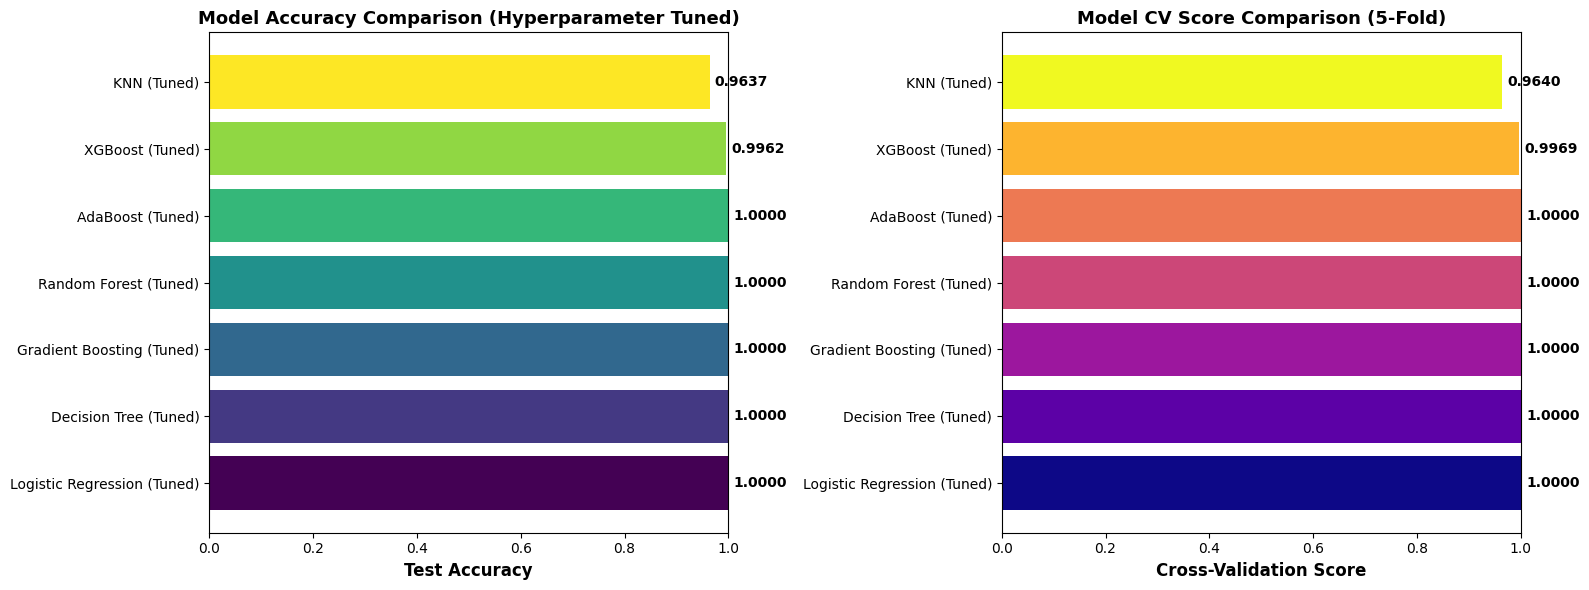


Best Model: Logistic Regression (Tuned)
Best Accuracy: 1.0000


In [ ]:
# Comprehensive Model Comparison
print("\n" + "=" * 80)
print("COMPREHENSIVE MODEL COMPARISON - ALL MODELS WITH HYPERPARAMETER TUNING")
print("=" * 80)

models_comparison_all = pd.DataFrame({
    'Model': [
        'Logistic Regression (Tuned)',
        'Decision Tree (Tuned)',
        'KNN (Tuned)',
        'Gradient Boosting (Tuned)',
        'AdaBoost (Tuned)',
        'XGBoost (Tuned)',
        'Random Forest (Tuned)'
    ],
    'Accuracy': [
        accuracy_lr_tuned,
        accuracy_dt,
        accuracy_knn,
        accuracy_gb,
        accuracy_ab,
        accuracy_xgb,
        accuracy_rf_tuned
    ],
    'CV Score': [
        lr_grid.best_score_,
        dt_grid.best_score_,
        knn_grid.best_score_,
        gb_grid.best_score_,
        ab_grid.best_score_,
        xgb_grid.best_score_,
        rf_grid.best_score_
    ]
}).sort_values('Accuracy', ascending=False)

print("\n", models_comparison_all.to_string(index=False))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy Comparison
axes[0].barh(models_comparison_all['Model'], models_comparison_all['Accuracy'], 
             color=plt.cm.viridis(np.linspace(0, 1, len(models_comparison_all))))
axes[0].set_xlabel('Test Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('Model Accuracy Comparison (Hyperparameter Tuned)', 
                  fontsize=13, fontweight='bold')
axes[0].set_xlim([0, 1])
for i, v in enumerate(models_comparison_all['Accuracy']):
    axes[0].text(v + 0.01, i, f'{v:.4f}', va='center', fontweight='bold')

# CV Score Comparison
axes[1].barh(models_comparison_all['Model'], models_comparison_all['CV Score'],
             color=plt.cm.plasma(np.linspace(0, 1, len(models_comparison_all))))
axes[1].set_xlabel('Cross-Validation Score', fontsize=12, fontweight='bold')
axes[1].set_title('Model CV Score Comparison (5-Fold)', 
                  fontsize=13, fontweight='bold')
axes[1].set_xlim([0, 1])
for i, v in enumerate(models_comparison_all['CV Score']):
    axes[1].text(v + 0.01, i, f'{v:.4f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nBest Model:", models_comparison_all.iloc[0]['Model'])
print(f"Best Accuracy: {models_comparison_all.iloc[0]['Accuracy']:.4f}")